# Plots and Figures

## 1. Imports and Definitions

In [263]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as matplot_colors
import matplotlib.cm as cmx
import matplotlib.patheffects as pe
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, ConnectionPatch

In [264]:
%matplotlib inline

In [355]:
# Define 3M and OFM Methods, Data Loaders and Plots
%run m3AndOfmMethods.ipynb
%run defineDataLoaders.ipynb
%run definePlots.ipynb

## 2. Figures and Plots

### 2.1 Define Color, Style and other Parameters

In [266]:
linestyles = {"CAE":'-', "CAER4":':', "CAER32":'-.',"CAER128":'--',"CAER256":'-',"CAER512":':',"CAER1024":'-.',
             "DCAE":'-', "DCAER4":':',  "DCAER32":'-.', "DCAER128":'--',  "DCAER256":'-', "DCAER512":':',"DCAER1024":'-.',
             "CCAE":'-', "CCAER4":':', "CCAER32":'-.',"CCAER128":'--',"CCAER256":'-',"CCAER512":':',"CCAER1024":'-.',
             "RCAE":'-', "RCAER4":':', "RCAER32":'-.',"RCAER128":'--',"RCAER256":'-',"RCAER512":':',"RCAER1024":'-.',
             "SCLCAE":'-', "SCLCAER4":':', "SCLCAER32":'-.',"SCLCAER128":'--',"SCLCAER256":'-',"SCLCAER512":':',"SCLCAER1024":'-.',
              
             "CAER256NoJitter":'--',  "CAER256NoJitterNoFlip":':',
             "DCAER256NoJitter":'--',  "DCAER256NoJitterNoFlip":':',
             "CCAER256NoFlip":'--',
             "RCAER128NoJitter":'--',  "RCAER128NoJitterNoFlip":':',
             "SCLCAER256NoJitter":'--',  "SCLCAER256NoJitterNoFlip":':',
              
             "LinearClassifierFC":'-', "NonLinearClassifier2FC":':', "NonLinearClassifier3FC":'-.',
            
             "CAER256E100":'-',"CAER256SameSplitx5":'-',
              
             "RResNet18":'-', "RResNet18R32":':',"RResNet18R256":'--',"RResNet18R512":'-',"RResNet18R756":':',"RResNet18R1024":'-.',
             
             "SCLResNet18":'-',
               
             "floor_hue":'-.', "object_hue":'-', "orientation":':', "scale":':', "shape":'--',  "wall_hue":'-'}

colors = {"CAE":'#5e6194', "CAER4":'#9799bd', "CAER32":'#7f82ae',"CAER128":'#7d73a6',"CAER256":'#5e6194',"CAER512":'#565988',"CAER1024":'#474970',
          "DCAE":'#f26d39', "DCAER4":'#f7a383',  "DCAER32":'#f4885e', "DCAER128":'#f69670',  "DCAER256":'#f26d39', "DCAER512":'#e14a0f',"DCAER1024":'#bc3e0c',
          "CCAE":'#436e99', "CCAER4":'#87a9cb', "CCAER32":'#6c95bf',"CCAER128":'#5081b3',"CCAER256":'#436e99',"CCAER512":'#375a7e',"CCAER1024":'#2b4763',
          "RCAE":'#b95e83', "RCAER4":'#dfb5c6', "RCAER32":'#d7a3b8',"RCAER128":'#cb87a3',"RCAER256":'#b95e83',"RCAER512":'#a74970',"RCAER1024":'#552539',
          "SCLCAE":'#4b8085', "SCLCAER4":'#89b8bd', "SCLCAER32":'#89b8bd',"SCLCAER128":'#59989e',"SCLCAER256":'#4b8085',"SCLCAER512":'#3d686c',"SCLCAER1024":'#2f5053',
              
          "CAER256NoJitter":'#436e99',  "CAER256NoJitterNoFlip":'#59989e',
          "DCAER256NoJitter":'#436e99',  "DCAER256NoJitterNoFlip":'#59989e',
          "CCAER256NoFlip":'#5e6194',
          "RCAER128NoJitter":'#436e99',  "RCAER128NoJitterNoFlip":'#59989e',
          "SCLCAER256NoJitter":'#436e99',  "SCLCAER256NoJitterNoFlip":'#59989e',
            
          "LinearClassifierFC":'#b95e83', "NonLinearClassifier2FC":'#59989e', "NonLinearClassifier3FC":'#436e99',
          
          "CAER256E100":'#5e6194',"CAER256SameSplitx5":'#5e6194',
          
          "RResNet18":'#b95e83', "RResNet18R32":'#dfb5c6',"RResNet18R256":'#cb87a3',"RResNet18R512":'#b95e83',"RResNet18R756":'#a74970',"RResNet18R1024":'#552539',
             
          "SCLResNet18":'#4b8085',
          
          "floor_hue":'#d7a3b8',"wall_hue":'#b95e83',"object_hue":'#552539', "orientation":'#5e83b9',"scale":'#3d5d8b',  "shape":'#7d73a6'}

In [267]:
# The tag of the acc logs in tensorboard log files
def getAccTag(string):
    if "SCLCAE" in string or "SCLResNet" in string: return "contrastive_acc"
    elif "RCAE" in string or "RResNet" in string: return "rotation_acc"
    else: return None
acc_tags = {key: getAccTag(key) for key in colors.keys()}   

In [268]:
use_interpolation=True

### 2.2 Define Data Paths

In [7]:
SAVE_DATA_PATH = "plots/"

In [312]:
DATA_PATH="/data/experiments/Paper/OFM/RepresentationSize"

In [743]:
DATA_PATH="/data/experiments/Paper/OFM/TargetTaskType"

In [252]:
DATA_PATH="/data/experiments/Paper/OFM/TargetModelComplexity"

In [356]:
DATA_PATH="/data/experiments/Paper/OFM/Augmentations"

In [386]:
DATA_PATH="/data/experiments/Paper/OFM/Others/ResNets"

In [137]:
DATA_PATH="/data/experiments/Paper/OFM/Others/CAEs"

In [338]:
DATA_PATH="/home/bonifaz/Dokumente/code/framework2/experimentResults"

### 2.3 Choose Models and Dataset to plot

#### 2.3.1 Choose Dataset

In [385]:
pretext_dataset_name = "cifar10"
target_dataset_name = "cifar10"
steps_per_epoch = 19  

In [271]:
pretext_dataset_name = "cifar100"
target_dataset_name = "cifar100"
steps_per_epoch = 19  

In [256]:
pretext_dataset_name = "shapes3d"
target_dataset_name = "shapes3d_label_object_hue"
#target_dataset_name = "shapes3d_label_object_hue"
#target_dataset_name = "shapes3d_label_floor_hue"
#target_dataset_name = "shapes3d_label_scale"
#target_dataset_name = "shapes3d_label_shape"
#target_dataset_name = "shapes3d_label_wall_hue"
steps_per_epoch = 187  

In [39]:
pretext_dataset_name = "patch_camelyon"
target_dataset_name = "patch_camelyon"
steps_per_epoch = 12  

In [712]:
pretext_dataset_name = "patch_camelyon"
target_dataset_name = "patch_camelyon"
steps_per_epoch = 25  

#### 2.3.2 Choose Target Model

In [333]:
target_model_name = "LinearClassifierFC"

In [257]:
target_model_name = "NonLinearClassifier2FC"

In [257]:
target_model_name = "NonLinearClassifier3FC"

#### 2.3.3 Choose Pretext Model

In [334]:
xFolds = [0,1,2,3,4]

In [34]:
pretext_model_names = ["CAER4","CAER32","CAER128","CAER256","CAER512","CAER1024"]

In [309]:
pretext_model_names = ["CAER256"]

In [115]:
pretext_model_names = ["CAER256","CAER256NoJitter","CAER256NoJitterNoFlip"]

In [805]:
pretext_model_names = ["DCAER4","DCAER32","DCAER128","DCAER256","DCAER512","DCAER1024"]

In [629]:
pretext_model_names = ["DCAER256"]

In [869]:
pretext_model_names = ["DCAER256","DCAER256NoJitter","DCAER256NoJitterNoFlip"]

In [23]:
pretext_model_names = ["CCAER4","CCAER32","CCAER128","CCAER256","CCAER512","CCAER1024"]

In [ ]:
pretext_model_names = ["CCAER512"]

In [ ]:
pretext_model_names = ["CCAER1024"]

In [ ]:
pretext_model_names = ["CCAER256","CCAER256NoFlip"]

In [38]:
pretext_model_names = ["RCAER4","RCAER32","RCAER128", "RCAER256","RCAER512","RCAER1024"]

In [243]:
pretext_model_names = ["RCAER128"]

In [295]:
pretext_model_names = ["RCAER128", "RCAER128NoJitter","RCAER128NoJitterNoFlip"]

In [228]:
pretext_model_names = ["SCLCAER4","SCLCAER32","SCLCAER128","SCLCAER256","SCLCAER512","SCLCAER1024"]

In [260]:
pretext_model_names = ["SCLCAER256"]

In [187]:
pretext_model_names = ["SCLCAER256","SCLCAER256NoJitter","SCLCAER256NoJitterNoFlip"]

In [791]:
pretext_model_names = ["CAE"]

In [ ]:
pretext_model_names = ["DCAE"]

In [ ]:
pretext_model_names = ["CCAE"]

In [ ]:
pretext_model_names = ["RCAE"]

In [ ]:
pretext_model_names = ["SCLCAE"]

In [335]:
pretext_model_names = ["RResNet18R32","RResNet18R256","RResNet18R512","RResNet18R756","RResNet18R1024"]

In [387]:
pretext_model_names = ["RResNet18"]

In [713]:
pretext_model_names = ["SCLResNet18"]

In [138]:
pretext_model_names = ["CAER256E100"]

In [492]:
pretext_model_names = ["CAER256SameSplitx5"]

### 2.4 Load Data and show Plots

In [407]:
patience = 99999
min_delta = 0

In [408]:
t_epochs_per_xFold_per_model, t_best_epochs_per_xFold_per_model, _, t_best_losses_per_xFold_per_model, _, _, t_best_loss_accs_per_xFold_per_model, t_best_accs_per_xFold_per_model = loadTargetModelTextEvalData(DATA_PATH, target_model_name, target_dataset_name, pretext_model_names, xFolds, steps_per_epoch)
p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, _, _, p_accs_per_xFold_per_model = loadPretextModelsEvalData(DATA_PATH, pretext_dataset_name, pretext_model_names, xFolds, steps_per_epoch, acc_enty_tags=acc_tags)
p_accs_per_xFold_per_model = np.multiply(p_accs_per_xFold_per_model,100)
p_err_per_xFold_per_model = np.subtract(100, p_accs_per_xFold_per_model)
t_best_loss_err_per_xFold_per_model = np.subtract(100, t_best_loss_accs_per_xFold_per_model)
t_best_err_per_xFold_per_model = np.subtract(100, t_best_accs_per_xFold_per_model)
p_converget_epoch_per_model = getConvergenceEpochPerModel(pretext_model_names, p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, patience=patience, min_delta=min_delta)

No convergence!
Using Convergence at Epoch: 4000 with loss: 0.40988988


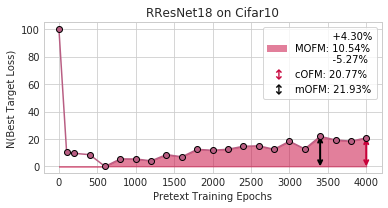

In [393]:
use_ofm=True
name = "MOFM" if use_ofm else "MSM3"

for i in range(len(pretext_model_names)):    
    with plt.style.context('seaborn-whitegrid'):  
        fig, ax = plt.subplots(figsize=(5.5,3))
        msm3, msm3_plus, msm3_minus, csm3, max_sm3 = addSM3orOFMBetweenCurvesPlot(ax, t_epochs_per_xFold_per_model[i][0], t_best_losses_per_xFold_per_model[i], pretext_model_names[i], colors, linestyles, p_converget_epoch_per_model[i], 
                                         use_interpolation=use_interpolation, use_ofm=use_ofm)
    label = "            +{:.2f}%".format(abs(msm3_plus)) 
    label += "\n"
    label += name + ": {:.2f}%".format(msm3)
    label += "\n"
    label += "            -{:.2f}%".format(abs(msm3_minus)) 
    legend_elements = [Patch(facecolor='#C70039', label=label, alpha=0.5),
                       Line2D([0], [0], linewidth=0, mew= 0.25, ms= 10, marker=u'$\u2195$', color='#C70039', label='cOFM: ' +"{:.2f}%".format(csm3)),
                       Line2D([0], [0], linewidth=0,  mew= 0.25, ms= 10, marker=u'$\u2195$', color='black', label='mOFM: ' + "{:.2f}%".format(max_sm3))]

    ax.legend(handles=legend_elements, ncol=1)
    ax.set_title(pretext_model_names[i] + " on " + target_dataset_name.capitalize())
    ax.set_ylabel('N(Best Target Loss)')
    ax.set_xlabel('Pretext Training Epochs')
    
    plt.tight_layout()                
    plt.savefig(SAVE_DATA_PATH+name+"OnLoss_" + str(pretext_model_names[i])+"_"+str(target_dataset_name)+".pdf")
    plt.show()  

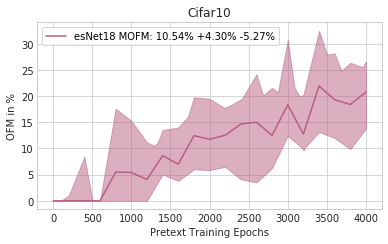

In [394]:
use_ofm = True
name = "OFM" if use_ofm else "SM3"

with plt.style.context('seaborn-whitegrid'): 
    fig, ax = plt.subplots(figsize=(5.5,3.5))
    msm3s, msm3s_plus, msm3s_minus = addSM3orOFMPlot(ax, t_epochs_per_xFold_per_model, t_best_losses_per_xFold_per_model, pretext_model_names, colors, 
                                                  linestyles, p_converget_epoch_per_model, use_interpolation=use_interpolation, use_ofm=use_ofm)             
ax.legend(ncol=1, loc=2)
ax.set_title(target_dataset_name.capitalize())
ax.set_ylabel(name + ' in %')
ax.set_xlabel('Pretext Training Epochs')

plt.tight_layout()                
plt.savefig(SAVE_DATA_PATH+name + "_" + str(pretext_model_names[-1])+"_"+str(target_dataset_name)+".pdf")
plt.show()  

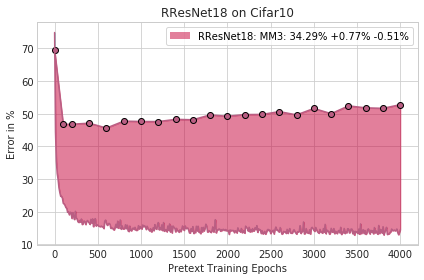

In [395]:
for i in range(len(pretext_model_names)):
    with plt.style.context('seaborn-whitegrid'):  
        fig, ax = plt.subplots() 
        mm3, mm3_plus, mm3_minus, mm3_color = addM3BetweenCurvesPlot(ax, t_epochs_per_xFold_per_model[i][0], p_epochs_per_xFold_per_model[i][0],
                                               t_best_err_per_xFold_per_model[i], p_err_per_xFold_per_model[i], pretext_model_names[i], colors, linestyles, p_converget_epoch_per_model[i], 
                                               use_interpolation=use_interpolation)
            
    label = pretext_model_names[i] + ': MM3: ' + "{:.2f}%".format(mm3)
    label += " +{:.2f}%".format(mm3_plus)
    label += " {:.2f}%".format(mm3_minus)
    
    legend_elements = [Patch(facecolor=mm3_color, label=label, alpha=0.5)]
    ax.legend(handles=legend_elements, ncol=1)
    ax.set_title(pretext_model_names[i] + " on " + target_dataset_name.capitalize())
    ax.set_ylabel('Error in %')
    ax.set_xlabel('Pretext Training Epochs')
  
    plt.tight_layout()                
    plt.savefig(SAVE_DATA_PATH+"M3BetweenCurves_" + str(pretext_model_names[i])+"_"+str(target_dataset_name)+".pdf")
    plt.show()  

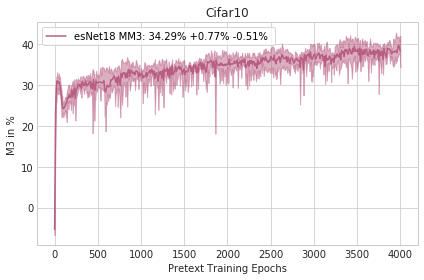

In [396]:
with plt.style.context('seaborn-whitegrid'):  
    fig, ax = plt.subplots()   
    m3s, m3_plus, m3_minus = addM3Plot(ax, t_epochs_per_xFold_per_model, p_epochs_per_xFold_per_model, t_best_err_per_xFold_per_model, 
                               p_err_per_xFold_per_model, pretext_model_names, colors, linestyles, p_converget_epoch_per_model, use_interpolation=use_interpolation)
            
ax.legend(ncol=1)
ax.set_title(target_dataset_name.capitalize())    
ax.set_ylabel('M3 in %')
ax.set_xlabel('Pretext Training Epochs')
    
plt.tight_layout()                
plt.savefig(SAVE_DATA_PATH+"M3_" + str(pretext_model_names[0])+"_"+str(target_dataset_name)+".pdf")
plt.show()  

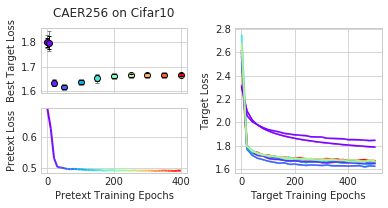

In [315]:
for i in range(len(pretext_model_names)):
   
    trained_models_per_epoch = loadTargetModelTensorboardEvalData(DATA_PATH, target_dataset_name, target_model_name, pretext_model_names[i], xFolds, steps_per_epoch)

    with plt.style.context('seaborn-whitegrid'):
        fig = plt.figure(figsize=(5.5,3))
        G = gridspec.GridSpec(2, 2)
        axes_1 = plt.subplot(G[0, 0])
        axes_2 = plt.subplot(G[:, 1])
        axes_3 = plt.subplot(G[1, 0], sharex=axes_1)    
        plt.setp(axes_1.get_xticklabels(), visible=False)
        _, cp_to_color, scalar_map = addTargetLossesPerPretextEpochColorPlot(axes_1, [t_epochs_per_xFold_per_model[i][0]], [t_best_losses_per_xFold_per_model[i]], [pretext_model_names[i]])     
        addTargetsLossesColorPlot(axes_2, trained_models_per_epoch, target_model_name, cp_to_color, scalar_map)
        addPretextLossesColorPlot(axes_3, p_epochs_per_xFold_per_model[i][0], p_losses_per_xFold_per_model[i], pretext_model_names[i])
    
    axes_1.set_title(pretext_model_names[i] + " on " + target_dataset_name.capitalize(), y=1.08)
    plt.tight_layout()    
    plt.savefig(SAVE_DATA_PATH+"lossesDetails_"+str(pretext_model_names[i])+"_"+str(target_dataset_name)+".pdf", bbox_inches='tight')
    plt.show()    

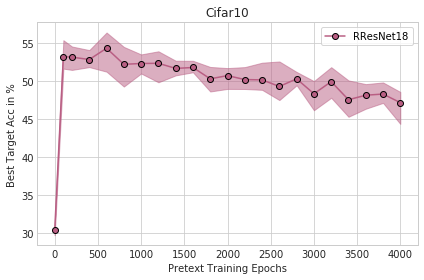

In [290]:
with plt.style.context('seaborn-whitegrid'):  
    fig, ax = plt.subplots()
    addMetricPlot(ax, t_epochs_per_xFold_per_model, t_best_accs_per_xFold_per_model, pretext_model_names, colors, linestyles)

ax.legend(ncol=2)
ax.set_title(target_dataset_name.capitalize())   
ax.set_ylabel('Best Target Acc in %')
ax.set_xlabel('Pretext Training Epochs')

plt.tight_layout()  
plt.savefig(SAVE_DATA_PATH+"targetAccs_" + str(pretext_model_names[0])+"_"+str(target_dataset_name)+".pdf")
plt.show()               

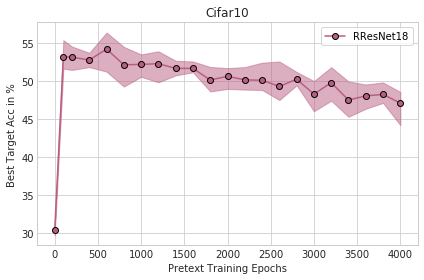

In [291]:
with plt.style.context('seaborn-whitegrid'):  
    fig, ax = plt.subplots()
    addMetricPlot(ax, t_epochs_per_xFold_per_model, t_best_loss_accs_per_xFold_per_model, pretext_model_names, colors, linestyles)

ax.legend(ncol=2)
ax.set_title(target_dataset_name.capitalize())   
ax.set_ylabel('Best Target Acc in %')
ax.set_xlabel('Pretext Training Epochs')

plt.tight_layout()  
plt.savefig(SAVE_DATA_PATH+"targetAccs_" + str(pretext_model_names[0])+"_"+str(target_dataset_name)+".pdf")
plt.show()               

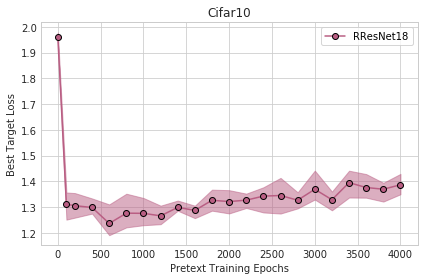

In [292]:
with plt.style.context('seaborn-whitegrid'):  
    fig, ax = plt.subplots()
    addMetricPlot(ax, t_epochs_per_xFold_per_model, t_best_losses_per_xFold_per_model, pretext_model_names, colors, linestyles)

ax.legend(ncol=2) 
ax.set_title(target_dataset_name.capitalize())   
ax.set_ylabel('Best Target Loss')
ax.set_xlabel('Pretext Training Epochs')

plt.tight_layout()   
plt.savefig(SAVE_DATA_PATH+"targetLosses_" + str(pretext_model_names[0])+"_"+str(target_dataset_name)+".pdf")
plt.show()               

In [409]:
for i in range(len(pretext_model_names)):
    csm3, csm3_plus, csm3_minus = cSM3AtConvergence(p_epochs_per_xFold_per_model[i],  p_losses_per_xFold_per_model[i], t_epochs_per_xFold_per_model[i], 
                                                    t_best_err_per_xFold_per_model[i], patience, min_delta)
    w = "${:.2f}".format(csm3) + "^{{+{:.2f}}}".format(abs(csm3_plus)) + "_{{-{:.2f}}}$".format(abs(csm3_minus))
    print(w)

No convergence!
Using Convergence at Epoch: 4000
No convergence!
Using Convergence at Epoch: 4000
No convergence!
Using Convergence at Epoch: 4000
No convergence!
Using Convergence at Epoch: 4000
No convergence!
Using Convergence at Epoch: 4000
$7.43^{+1.60}_{-3.42}$


### 2.5 Show Plots for the M3 and OFM

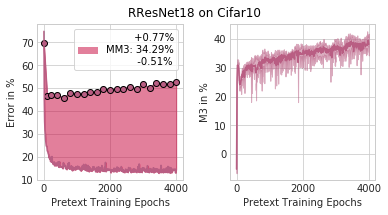

In [308]:
for i in range(len(pretext_model_names)):
   
    trained_models_per_epoch = loadTargetModelTensorboardEvalData(DATA_PATH, target_dataset_name, target_model_name, pretext_model_names[i], xFolds, steps_per_epoch)

    with plt.style.context('seaborn-whitegrid'):
        fig = plt.figure(figsize=(5.5,3))
        G = gridspec.GridSpec(1, 2)
        axes_1 = plt.subplot(G[0, 0])
        axes_2 = plt.subplot(G[0, 1])  
        mm3, mm3_plus, mm3_minus, mm3_color = addM3BetweenCurvesPlot(axes_1, t_epochs_per_xFold_per_model[i][0], p_epochs_per_xFold_per_model[i][0],
                                               t_best_err_per_xFold_per_model[i], p_err_per_xFold_per_model[i], pretext_model_names[i], colors, linestyles, p_converget_epoch_per_model[i], 
                                               use_interpolation=use_interpolation)
        mm3, mm3_plus, mm3_minus = addM3Plot(axes_2, t_epochs_per_xFold_per_model, p_epochs_per_xFold_per_model, t_best_err_per_xFold_per_model, 
                               p_err_per_xFold_per_model, pretext_model_names, colors, linestyles, p_converget_epoch_per_model, use_interpolation=use_interpolation)
     

    label = "         +{:.2f}%".format(mm3_plus[0])
    label += "\n"
    label += 'MM3: ' + "{:.2f}%".format(mm3[0])
    label += "\n"
    label += "          {:.2f}%".format(mm3_minus[0]) 
    legend_elements = [Patch(facecolor=mm3_color, label=label, alpha=0.5)]  
    axes_1.legend(handles=legend_elements, ncol=1)
    axes_1.set_ylabel('Error in %')
    axes_1.set_xlabel('Pretext Training Epochs')
    axes_2.set_ylabel('M3 in %')
    axes_2.set_xlabel('Pretext Training Epochs')
           
    fig.suptitle(pretext_model_names[i] + " on " + target_dataset_name.capitalize())
    plt.tight_layout() 
    fig.subplots_adjust(top=0.9)
    
    plt.savefig(SAVE_DATA_PATH+"M3andMM3_" + str(pretext_model_names[i])+"_"+str(target_dataset_name)+".pdf", bbox_inches='tight')
    plt.show()    

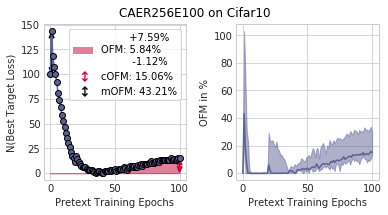

In [146]:
use_ofm=True
name = "OFM" if use_ofm else "SM3"
    
for i in range(len(pretext_model_names)):
   
    trained_models_per_epoch = loadTargetModelTensorboardEvalData(DATA_PATH, target_dataset_name, target_model_name, pretext_model_names[i], xFolds, steps_per_epoch)

    with plt.style.context('seaborn-whitegrid'): 
        fig = plt.figure(figsize=(5.5,3))
        G = gridspec.GridSpec(1, 2)
        axes_1 = plt.subplot(G[0, 0])
        axes_2 = plt.subplot(G[0, 1])  
        msm3, msm3_plus, msm3_minus, csm3, max_sm3 = addSM3orOFMBetweenCurvesPlot(axes_1, t_epochs_per_xFold_per_model[i][0], t_best_losses_per_xFold_per_model[i], pretext_model_names[i], colors, linestyles, p_converget_epoch_per_model[i], 
                                         use_interpolation=use_interpolation, use_ofm=use_ofm)
        msm3, msm3_plus, msm3_minus = addSM3orOFMPlot(axes_2, t_epochs_per_xFold_per_model, t_best_losses_per_xFold_per_model, pretext_model_names, colors, 
                                                  linestyles, p_converget_epoch_per_model, use_interpolation=use_interpolation, use_ofm=use_ofm)       
    
    label = "         +{:.2f}%".format(msm3_plus[0])
    label += "\n"
    label += name + ": {:.2f}%".format(msm3[0])
    label += "\n"
    label += "          -{:.2f}%".format((abs(msm3_minus[0])))
    legend_elements = [Patch(facecolor='#C70039', label=label, alpha=0.5),
                       Line2D([0], [0], linewidth=0, mew= 0.25, ms= 10, marker=u'$\u2195$', color='#C70039', label='cOFM: ' +"{:.2f}%".format(csm3)),
                       Line2D([0], [0], linewidth=0,  mew= 0.25, ms= 10, marker=u'$\u2195$', color='black', label='mOFM: ' + "{:.2f}%".format(max_sm3))]
        
    axes_1.legend(handles=legend_elements, ncol=1)
    axes_1.set_ylabel('N(Best Target Loss)') 
    axes_1.set_xlabel('Pretext Training Epochs')
    axes_2.set_ylabel(name + ' in %')
    axes_2.set_xlabel('Pretext Training Epochs')
    
    fig.suptitle(pretext_model_names[i] + " on " + target_dataset_name.capitalize())
    plt.tight_layout() 
    fig.subplots_adjust(top=0.9)
    
    plt.savefig(SAVE_DATA_PATH+"SM3andMSM3_" + str(pretext_model_names[i])+"_"+str(target_dataset_name)+".pdf", bbox_inches='tight')
    plt.show()    

### 2.6 Load Data and show Plots for the Target Model Complexities

In [293]:
pretext_model_name = "RCAER128"
pretext_dataset_name = "patch_camelyon"
target_dataset_name = "patch_camelyon"
steps_per_epoch = 12

In [264]:
pretext_model_name = "SCLCAER256"
pretext_dataset_name = "shapes3d"
target_dataset_name = "shapes3d_label_object_hue" 
steps_per_epoch = 187  

In [294]:
DATA_PATH="/data/experiments/Paper/OFM/TargetModelComplexity"
target_model_names = ["LinearClassifierFC","NonLinearClassifier2FC", "NonLinearClassifier3FC"]
xFolds = [0,1,2,3,4]

In [295]:
p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, _, _, p_accs_per_xFold_per_model = loadPretextModelsEvalData(DATA_PATH, pretext_dataset_name, [pretext_model_name], xFolds, steps_per_epoch, acc_enty_tags=acc_tags)
p_converget_epoch_per_model = getConvergenceEpochPerModel([pretext_model_name], p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, patience=patience, min_delta=0)
p_errs_per_xFold_per_model = np.subtract(100,p_accs_per_xFold_per_model)

No convergence!
Using Convergence at Epoch: 2000 with loss: 0.9037117


In [296]:
t_epochs_per_xFold_per_target_model = []
t_best_losses_per_xFold_per_target_model = []
t_best_errs_per_xFold_per_target_model=[]
for target_model_name in target_model_names:
    t_epochs_per_xFold_per_model, _, _, t_best_losses_per_xFold_per_model, _, _, _,t_best_accs_per_xFold_per_model = loadTargetModelTextEvalData(DATA_PATH, target_model_name, target_dataset_name, [pretext_model_name], xFolds, steps_per_epoch)
    t_epochs_per_xFold_per_target_model.append(t_epochs_per_xFold_per_model[0])
    t_best_losses_per_xFold_per_target_model.append(t_best_losses_per_xFold_per_model[0])
    t_best_errs_per_xFold_per_target_model.append(np.subtract(100, t_best_accs_per_xFold_per_model[0]))

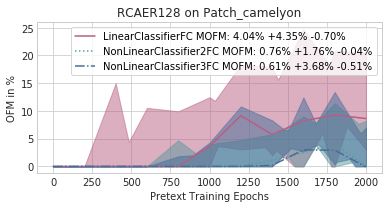

In [297]:
use_ofm=True
name = "OFM" if use_ofm else "SM3"

with plt.style.context('seaborn-whitegrid'):  
    fig, ax = plt.subplots(figsize=(5.5,3))
    msm3s, msm3s_plus, msm3s_minus = addSM3orOFMPlot(ax, t_epochs_per_xFold_per_target_model, t_best_losses_per_xFold_per_target_model, target_model_names, colors, 
                                                  linestyles, [p_converget_epoch_per_model,p_converget_epoch_per_model,p_converget_epoch_per_model], use_interpolation=use_interpolation, use_ofm=use_ofm)       
         
ax.legend(ncol=1)
ax.set_title(pretext_model_name + " on " + target_dataset_name.capitalize())
ax.set_ylabel(name + ' in %')
ax.set_xlabel('Pretext Training Epochs')

plt.tight_layout()                
plt.savefig(SAVE_DATA_PATH+name + "_" + str(pretext_model_name)+"_TargetModelComplexity.pdf")
plt.show()  

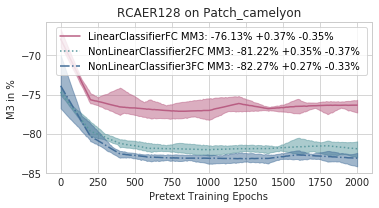

In [298]:
with plt.style.context('seaborn-whitegrid'):  
    fig, ax = plt.subplots(figsize=(5.5,3))
    mm3, mm3_plus, mm3_minus = addM3Plot(ax, t_epochs_per_xFold_per_target_model, [p_epochs_per_xFold_per_model[0],p_epochs_per_xFold_per_model[0],p_epochs_per_xFold_per_model[0]], t_best_errs_per_xFold_per_target_model, 
                               [p_errs_per_xFold_per_model[0],p_errs_per_xFold_per_model[0],p_errs_per_xFold_per_model[0]], target_model_names, colors, linestyles, [p_converget_epoch_per_model,p_converget_epoch_per_model,p_converget_epoch_per_model], use_interpolation=use_interpolation)
       
ax.legend(ncol=1)
ax.set_title(pretext_model_name + " on " + target_dataset_name.capitalize())
ax.set_ylabel('M3 in %')
ax.set_xlabel('Pretext Training Epochs')

plt.tight_layout()                
plt.savefig(SAVE_DATA_PATH+ "M3_" + str(pretext_model_name)+"_TargetModelComplexity.pdf")
plt.show()  

### 2.7 Load Data and show Plots for the Representation Sizees, Target Model Complexities and Augmentations

In [410]:
plot_colors = {}
for key, value in colors.items():
    if "No" in key: value = value
    elif "R4" in key: value = '#4b8085'    
    elif "R32" in key: value = '#59989e'
    elif "R128" in key: value = '#cb87a3'
    elif "R256" in key: value = '#b95e83'
    elif "R512" in key: value = '#5081b3'
    elif "R1024" in key: value = '#436e99'
    plot_colors[key] = value

In [411]:
DATA_PATH_REP="/data/experiments/Paper/OFM/RepresentationSize"
DATA_PATH_TC="/data/experiments/Paper/OFM/TargetModelComplexity"
DATA_PATH_AUG="/data/experiments/Paper/OFM/Augmentations"

In [412]:
model_names=["CAE","DCAE","CCAE","CCAE_2","RCAE","SCLCAE"]
task_names=["REP","TC","AUG"]

pretext_model_names = {
    "REP":{"CAE":["CAER4","CAER32","CAER128","CAER256","CAER512","CAER1024"],
           "DCAE":["DCAER4","DCAER32","DCAER128","DCAER256","DCAER512","DCAER1024"],
           "CCAE":["CCAER4","CCAER32","CCAER128","CCAER256","CCAER512","CCAER1024"],
           "CCAE_2":["CCAER4","CCAER32","CCAER128","CCAER256","CCAER512","CCAER1024"],
           "RCAE":["RCAER4","RCAER32","RCAER128","RCAER256","RCAER512","RCAER1024"],
           "SCLCAE":["SCLCAER4","SCLCAER32","SCLCAER128","SCLCAER256","SCLCAER512", "SCLCAER1024"]},
    
    "TC":{"CAE":"CAER256", "DCAE":"DCAER256", "CCAE":"CCAER512", "CCAE_2":"CCAER1024", "RCAE":"RCAER128", "SCLCAE":"SCLCAER256"},
    "AUG":{"CAE":["CAER256","CAER256NoJitter","CAER256NoJitterNoFlip"],
           "DCAE":["DCAER256","DCAER256NoJitter","DCAER256NoJitterNoFlip"],
           "CCAE":["CCAER256","CCAER256NoFlip"],
           "CCAE_2":["CCAER256","CCAER256NoFlip"],
           "RCAE":["RCAER128","RCAER128NoJitter","RCAER128NoJitterNoFlip"],
           "SCLCAE":["SCLCAER256","SCLCAER256NoJitter","SCLCAER256NoJitterNoFlip"]}}

target_model_names = ["LinearClassifierFC","NonLinearClassifier2FC", "NonLinearClassifier3FC"]
 
pretext_dataset_names = {"CAE":"cifar10", "DCAE":"cifar10", "CCAE":"cifar100", "CCAE_2":"patch_camelyon", "RCAE":"patch_camelyon", "SCLCAE":"shapes3d"}
target_dataset_names = {"CAE":"cifar10","DCAE":"cifar10", "CCAE":"cifar100", "CCAE_2":"patch_camelyon",  "RCAE":"patch_camelyon", "SCLCAE":"shapes3d_label_object_hue"}

steps_per_epoch = {"CAE":19, "DCAE":19, "CCAE":19, "CCAE_2":12, "RCAE":12, "SCLCAE":187}
xFolds = {"CAE":[0,1,2,3,4], "DCAE":[0,1,2,3,4], "CCAE":[0,1,2,3,4], "CCAE_2":[0,1,2,3,4],  "RCAE":[0,1,2,3,4], "SCLCAE":[0,1,2,3,4]}   
#patience= {"CAE":3, "DCAE":3, "CCAE":6, "CCAE_2":10, "RCAE":30, "SCLCAE":15}
patience= {"CAE":99999, "DCAE":99999, "CCAE":99999, "CCAE_2":99999, "RCAE":99999, "SCLCAE":99999}

No convergence!
Using Convergence at Epoch: 400 with loss: 0.53099126
No convergence!
Using Convergence at Epoch: 400 with loss: 0.4968515
No convergence!
Using Convergence at Epoch: 400 with loss: 0.49328333
No convergence!
Using Convergence at Epoch: 400 with loss: 0.492126
No convergence!
Using Convergence at Epoch: 400 with loss: 0.49107438
No convergence!
Using Convergence at Epoch: 400 with loss: 0.49157825
No convergence!
Using Convergence at Epoch: 400 with loss: 0.492126
No convergence!
Using Convergence at Epoch: 400 with loss: 0.492126
No convergence!
Using Convergence at Epoch: 400 with loss: 0.5575236
No convergence!
Using Convergence at Epoch: 400 with loss: 0.55747014
No convergence!
Using Convergence at Epoch: 400 with loss: 0.52972585
No convergence!
Using Convergence at Epoch: 400 with loss: 0.49899164
No convergence!
Using Convergence at Epoch: 400 with loss: 0.49415255
No convergence!
Using Convergence at Epoch: 400 with loss: 0.4932893
No convergence!
Using Converg

/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


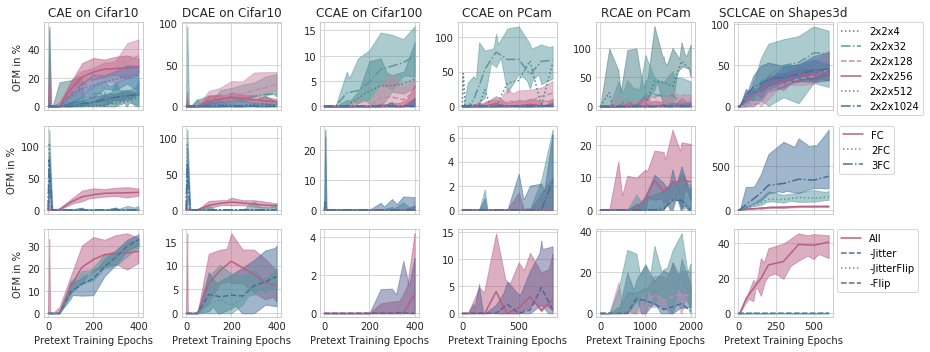

In [413]:
use_ofm=True
name = "OFM" if use_ofm else "SM3"

with plt.style.context('seaborn-whitegrid'): 
    fig = plt.figure(figsize=(6, 5)) # Paper
    fig = plt.figure(figsize=(2*len(model_names), 5))
    G = gridspec.GridSpec(3, len(model_names))
    for i in range(0,len(model_names)):
        mn = model_names[i]
        
        t_epochs_per_xFold_per_model, _, _, t_best_losses_per_xFold_per_model, _, _,_, t_best_accs_per_xFold_per_model = loadTargetModelTextEvalData(
            DATA_PATH_REP, target_model_names[0], target_dataset_names[mn], pretext_model_names["REP"][mn], xFolds[mn], steps_per_epoch[mn])
        p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, _, _, p_accs_per_xFold_per_model = loadPretextModelsEvalData(
            DATA_PATH_REP, pretext_dataset_names[mn], pretext_model_names["REP"][mn], xFolds[mn], steps_per_epoch[mn], acc_enty_tags=acc_tags)
        p_converget_epoch_per_model = getConvergenceEpochPerModel(
            pretext_model_names["REP"][mn], p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, patience=patience[mn], min_delta=0)
        
        t_epochs_per_xFold_per_target_model = []
        t_best_losses_per_xFold_per_target_model = []
        t_best_accs_per_xFold_per_target_model = []
        for target_model_name in target_model_names:
            t_epochs_per_xFold_per_model_tm, _, _, t_best_losses_per_xFold_per_model_tm, _, _,_, t_best_accs_per_xFold_per_model_tm = loadTargetModelTextEvalData(
                DATA_PATH_TC, target_model_name, target_dataset_names[mn], [pretext_model_names["TC"][mn]], xFolds[mn], steps_per_epoch[mn])
            t_epochs_per_xFold_per_target_model.append(t_epochs_per_xFold_per_model_tm[0])
            t_best_accs_per_xFold_per_target_model.append(t_best_accs_per_xFold_per_model_tm[0])
            t_best_losses_per_xFold_per_target_model.append(t_best_losses_per_xFold_per_model_tm[0])
            
        p_epochs_per_xFold_per_model_tm, p_losses_per_xFold_per_model_tm, _, _, p_accs_per_xFold_per_model_tm = loadPretextModelsEvalData(
            DATA_PATH_TC, pretext_dataset_names[mn], [pretext_model_names["TC"][mn]], xFolds[mn], steps_per_epoch[mn], acc_enty_tags=acc_tags)
        p_converget_epoch_per_model_tm = getConvergenceEpochPerModel(
            [pretext_model_names["TC"][mn]], p_epochs_per_xFold_per_model_tm, p_losses_per_xFold_per_model_tm, patience=patience[mn], min_delta=0)
 
        t_epochs_per_xFold_per_model_aug, _, _, t_best_losses_per_xFold_per_model_aug, _, _,_, t_best_accs_per_xFold_per_model_aug = loadTargetModelTextEvalData(
            DATA_PATH_AUG, target_model_names[0], target_dataset_names[mn], pretext_model_names["AUG"][mn], xFolds[mn], steps_per_epoch[mn])
        p_epochs_per_xFold_per_model_aug, p_losses_per_xFold_per_model_aug, _, _, p_accs_per_xFold_per_model_aug = loadPretextModelsEvalData(
            DATA_PATH_AUG, pretext_dataset_names[mn], pretext_model_names["AUG"][mn], xFolds[mn], steps_per_epoch[mn], acc_enty_tags=acc_tags)
        p_converget_epoch_per_model_aug = getConvergenceEpochPerModel(
            pretext_model_names["AUG"][mn], p_epochs_per_xFold_per_model_aug, p_losses_per_xFold_per_model_aug, patience=patience[mn], min_delta=0)   
   
        t_best_errs_per_xFold_per_model = np.subtract(100,t_best_accs_per_xFold_per_model)
        t_best_errs_per_xFold_per_target_model = np.subtract(100,t_best_accs_per_xFold_per_target_model)
        t_best_errs_per_xFold_per_model_aug = np.subtract(100,t_best_accs_per_xFold_per_model_aug) 
        p_accs_per_xFold_per_model = np.multiply(p_accs_per_xFold_per_model, 100)
        p_accs_per_xFold_per_model_tm = np.multiply(p_accs_per_xFold_per_model_tm, 100)
        p_accs_per_xFold_per_model_aug = np.multiply(p_accs_per_xFold_per_model_aug, 100) 
        p_best_errs_per_xFold_per_model = np.subtract(100,p_accs_per_xFold_per_model)
        p_best_errs_per_xFold_per_model_tm = np.subtract(100,p_accs_per_xFold_per_model_tm)
        p_best_errs_per_xFold_per_model_aug = np.subtract(100,p_accs_per_xFold_per_model_aug)    
        axes_1 = plt.subplot(G[0, i])
        axes_2 = plt.subplot(G[1, i],sharex=axes_1)    
        axes_3 = plt.subplot(G[2, i],sharex=axes_1)
        plt.setp(axes_1.get_xticklabels(), visible=False)
        plt.setp(axes_2.get_xticklabels(), visible=False)
        dn = pretext_dataset_names[mn].capitalize()
        mnt = mn
        if mn == "CCAE_2":
            mnt = "CCAE"   
        if dn == "Patch_camelyon":
            dn = "PCam"
        axes_1.set_title(mnt + " on " + dn)
        if i is 0:
            axes_1.set_ylabel(name + ' in %')
            axes_2.set_ylabel(name + ' in %')
            axes_3.set_ylabel(name + ' in %') 
       
        if use_ofm:
            msm3s_r, msm3s_plus_r, msm3s_minus_r = addSM3orOFMPlot(axes_1, t_epochs_per_xFold_per_model, t_best_losses_per_xFold_per_model, pretext_model_names["REP"][mn], plot_colors, 
                                                       linestyles, p_converget_epoch_per_model, use_interpolation=use_interpolation, use_ofm=use_ofm)
            msm3s_t, msm3s_plus_t, msm3s_minus_t = addSM3orOFMPlot(axes_2, t_epochs_per_xFold_per_target_model, t_best_losses_per_xFold_per_target_model, target_model_names, plot_colors, 
                                                             linestyles, [p_converget_epoch_per_model_tm, p_converget_epoch_per_model_tm,p_converget_epoch_per_model_tm], 
                                                                use_interpolation=use_interpolation, use_ofm=use_ofm) 
            msm3s_a, msm3s_plus_a, msm3s_minus_a = addSM3orOFMPlot(axes_3, t_epochs_per_xFold_per_model_aug, t_best_losses_per_xFold_per_model_aug, pretext_model_names["AUG"][mn], plot_colors, 
                                                             linestyles, p_converget_epoch_per_model_aug, use_interpolation=use_interpolation, use_ofm=use_ofm)
        else:           
            msm3s_r, msm3s_plus_r, msm3s_minus_r = addSM3orOFMPlot(axes_1, t_epochs_per_xFold_per_model, t_best_errs_per_xFold_per_model, pretext_model_names["REP"][mn], plot_colors, 
                                                             linestyles, p_converget_epoch_per_model, use_interpolation=use_interpolation, use_ofm=use_ofm)
            msm3s_t, msm3s_plus_t, msm3s_minus_t = addSM3orOFMPlot(axes_2, t_epochs_per_xFold_per_target_model, t_best_errs_per_xFold_per_target_model, target_model_names, plot_colors, 
                                                             linestyles, [p_converget_epoch_per_model_tm, p_converget_epoch_per_model_tm,p_converget_epoch_per_model_tm], use_interpolation=use_interpolation, use_ofm=use_ofm) 
            msm3s_a, msm3s_plus_a, msm3s_minus_a = addSM3orOFMPlot(axes_3, t_epochs_per_xFold_per_model_aug, t_best_errs_per_xFold_per_model_aug, pretext_model_names["AUG"][mn], plot_colors, 
                                                             linestyles, p_converget_epoch_per_model_aug, use_interpolation=use_interpolation, use_ofm=use_ofm)
      
        
        if mn is "CCAE":
            axes_3_handels1, _ =  axes_3.get_legend_handles_labels()
        axes_3.set_xlabel('Pretext Training Epochs')

handles, labels = axes_1.get_legend_handles_labels()
labels = ["2x2x" + label.split("R")[-1].split(" M"+name)[0]  for label in labels]
axes_1.legend(handles, labels, bbox_to_anchor=(1.04,1), borderaxespad=0)

handles, labels = axes_2.get_legend_handles_labels()
labels = ["FC", "2FC", "3FC"]
axes_2.legend(handles, labels, bbox_to_anchor=(1.61,1), borderaxespad=0)

handles, labels = axes_3.get_legend_handles_labels()

if "CCAE" in model_names:   
    handles = [handles[0],handles[1],handles[2],axes_3_handels1[1]]
    labels = ["All", "-Jitter", "-JitterFlip", "-Flip"]
else:
    labels = ["All", "-Jitter", "-JitterFlip"]

axes_3.legend(handles, labels, bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.tight_layout()                
plt.savefig(SAVE_DATA_PATH+name + "_TargetModelComplexityAugsAndRepSize.pdf", bbox_inches='tight')
plt.show()  

### 2.8 Load Data and show Plots for the Target Task Types

In [326]:
DATA_PATH="/data/experiments/Paper/OFM/TargetTaskType"
pretext_model_names = ["CAE", "DCAE", "CCAE", "RCAE","SCLCAE"]
target_model_name = "LinearClassifierFC"
pretext_dataset_name = "shapes3d"
target_dataset_names = ["shapes3d_label_floor_hue", "shapes3d_label_wall_hue",  "shapes3d_label_object_hue", "shapes3d_label_orientation", "shapes3d_label_scale", "shapes3d_label_shape"]
steps_per_epoch = 187  
xFolds = [0,1,2,3,4]

In [327]:
p_epochs_per_xFold_per_model, p_losses_per_xFold_per_model, _, _, p_accs_per_xFold_per_model = loadPretextModelsEvalData(DATA_PATH, pretext_dataset_name, pretext_model_names, xFolds, steps_per_epoch, acc_enty_tags=acc_tags)

In [328]:
t_epochs_per_xFold_per_target_per_model = []
t_best_losses_per_xFold_per_target_per_model = []
t_best_loss_err_per_xFold_per_target_per_model = []
for pretext_model_name in pretext_model_names:
    t_epochs_per_xFold_per_target = []
    t_best_losses_per_xFold_per_target = []
    t_best_loss_err_per_xFold_per_target = []
    for target_dataset_name in target_dataset_names:
        t_epochs_per_xFold, _, _, t_best_losses_per_xFold, _, _, _, t_best_loss_accs_per_xFold = loadTargetModelTextEvalData(DATA_PATH, target_model_name, target_dataset_name, [pretext_model_name], xFolds, steps_per_epoch)
        t_epochs_per_xFold_per_target.append(t_epochs_per_xFold[0])
        t_best_losses_per_xFold_per_target.append(t_best_losses_per_xFold[0])
        t_best_loss_err_per_xFold_per_target.append(np.subtract(100, t_best_loss_accs_per_xFold[0]))
    t_epochs_per_xFold_per_target_per_model.append(t_epochs_per_xFold_per_target)
    t_best_losses_per_xFold_per_target_per_model.append(t_best_losses_per_xFold_per_target)
    t_best_loss_err_per_xFold_per_target_per_model.append(t_best_loss_err_per_xFold_per_target)
    
target_dataset_names = [x.split("label_")[1] for x in target_dataset_names]

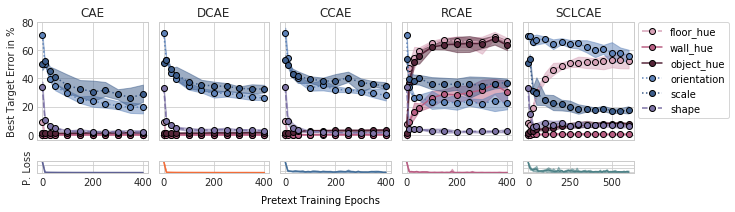

In [329]:
# Create, show and save plot
with plt.style.context('seaborn-whitegrid'):  
    fig,_ = plt.subplots(figsize=(1.8*len(pretext_model_names),3))
    G = gridspec.GridSpec(2, len(pretext_model_names), height_ratios=[10, 1])
    for i in range(len(pretext_model_names)):
       
        axes_1 = plt.subplot(G[1, i])
        if i is 0:
            axes_0 = plt.subplot(G[0, i])
            axes_0.set_ylabel('Best Target Error in %')
            axes_1.set_ylabel('P. Loss')
            axes_1.set_xlabel(" ")
        else:
            axes_0 = plt.subplot(G[0, i], sharey=axes_0)
            plt.setp(axes_0.get_yticklabels(), visible=False)
            
        addMetricPlot(axes_0, t_epochs_per_xFold_per_target_per_model[i], t_best_loss_err_per_xFold_per_target_per_model[i], target_dataset_names, colors, linestyles)   
        addPretextMetricPlot(axes_1, [p_epochs_per_xFold_per_model[i]], [p_losses_per_xFold_per_model[i]], [pretext_model_names[i]], colors, linestyles)
        axes_0.set_title(pretext_model_names[i])
        plt.setp(axes_0.get_xticklabels(), visible=False)
        plt.setp(axes_1.get_yticklabels(), visible=False)
             
axes_0.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
fig.text(0.5, 0.04, "Pretext Training Epochs", ha='center')  
plt.tight_layout() 
plt.savefig(SAVE_DATA_PATH+"shapes3DTargetErrs.pdf", bbox_inches="tight")
plt.show()       

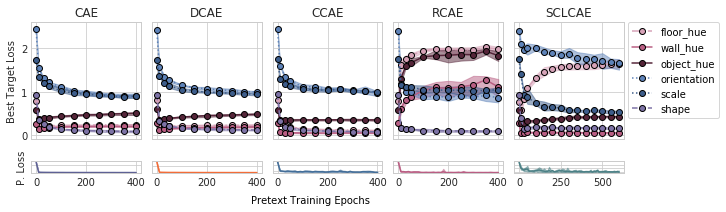

In [330]:
# Create, show and save plot
with plt.style.context('seaborn-whitegrid'):  
    fig,_ = plt.subplots(figsize=(1.8*len(pretext_model_names),3))
    G = gridspec.GridSpec(2, len(pretext_model_names), height_ratios=[10, 1])
    for i in range(len(pretext_model_names)):
       
        axes_1 = plt.subplot(G[1, i])
        if i is 0:
            axes_0 = plt.subplot(G[0, i])
            axes_0.set_ylabel('Best Target Loss')
            axes_1.set_ylabel('P. Loss')
            axes_1.set_xlabel(" ")
        else:
            axes_0 = plt.subplot(G[0, i], sharey=axes_0)
            plt.setp(axes_0.get_yticklabels(), visible=False)
            
        addMetricPlot(axes_0, t_epochs_per_xFold_per_target_per_model[i], t_best_losses_per_xFold_per_target_per_model[i], target_dataset_names, colors, linestyles)   
        addPretextMetricPlot(axes_1, [p_epochs_per_xFold_per_model[i]], [p_losses_per_xFold_per_model[i]], [pretext_model_names[i]], colors, linestyles)
        axes_0.set_title(pretext_model_names[i])
        plt.setp(axes_0.get_xticklabels(), visible=False)
        plt.setp(axes_1.get_yticklabels(), visible=False)
            
axes_0.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.tight_layout() 
fig.text(0.5, 0.04, "Pretext Training Epochs", ha='center')              
plt.savefig(SAVE_DATA_PATH+"shapes3DTargetLosses.pdf", bbox_inches="tight")
plt.show()  